# 8.4 Exercises

Since this chapter didn’t introduce many new or complex concepts, we'll take some time to review and practice skills you've learned in previous chapters through some exercises.

Today’s dataset includes various variables related to student stress factors and mental health. You’ll be exploring the following research question:

**Does social support moderate the effect of anxiety on self-esteem?**

## Exercise 1

1. Begin by exploring the dataset—look at the first few rows to get familiar with its structure.
2. Select only the variables relevant to your research question (subset the dataset)
3. Create a heatmap showing the correlation between the three variables (anxiety, social support, and self-esteem).


<bound method NDFrame.head of       anxiety_level  self_esteem  social_support
0                14           20               2
1                15            8               1
2                12           18               2
3                16           12               1
4                16           28               1
...             ...          ...             ...
1095             11           17               3
1096              9           12               1
1097              4           26               3
1098             21            0               1
1099             18            6               1

[1100 rows x 3 columns]>


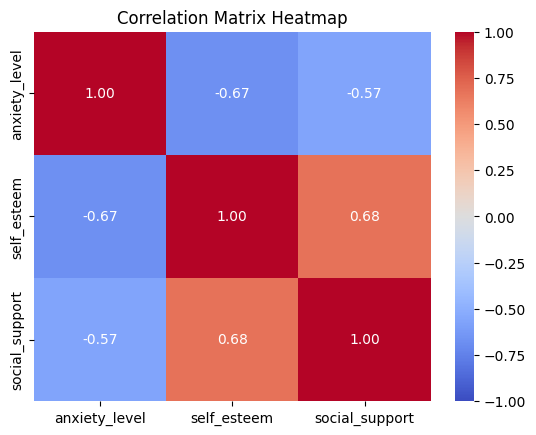

In [ ]:
import pandas as pd

datadf = pd.read_csv("data/StressLevelDataset.csv", delimiter='\t')


###SOLUTION####

#subset the data before use

df=data[['anxiety_level', 'self_esteem', 'social_support']]

print(df.head)

df.describe()

import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt=".2f")

# Set the title and show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

## Exercise 2
1. Center the variables anxiety_level and self_esteem by subtracting their mean values.
2. Perform a linear regression using ols() from Statsmodels.


<div style="border-left: 4px solid orange; padding: 10px 15px; background-color: #FFF8E1; border-radius: 5px;">
    <p style="font-weight: bold; color: orange; margin-top: 0; font-size: 16px;">Warning</p>
    <ul style="color: black; font-size: 14px; margin-top: 5px;">
        <li><code style="color: black; background-color: #F5F5F5; padding: 2px 4px; border-radius: 3px;">social_support</code> is NOT a continuous variable.</li>
        <li>Remember how to implement categorical variables. For example, you can use dummy coding in your model with a reference category, as shown here: <code style="color: black; background-color: #F5F5F5; padding: 2px 4px; border-radius: 3px;">lm_model <- lm(WMf ~ C(genotype, Treatment(reference="your reference")), data=dat)</code> for dummy coding.</li>
    </ul>
</div>



In [ ]:
##SOLUTION##

df_c= df.copy()

df_c['anxiety_centered'] = df['anxiety_level'] - df['anxiety_level'].mean()
df_c['self_esteem_centered'] = df['self_esteem'] - df['self_esteem'].mean()



In [ ]:
##SOLUTION##
import statsmodels.formula.api as smf
model = smf.ols('self_esteem_centered ~ anxiety_centered * C(social_support, Treatment(reference=0))', data=df_c).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     self_esteem_centered   R-squared:                       0.658
Model:                              OLS   Adj. R-squared:                  0.655
Method:                   Least Squares   F-statistic:                     299.6
Date:                  Sun, 03 Nov 2024   Prob (F-statistic):          5.40e-249
Time:                          14:54:47   Log-Likelihood:                -3381.0
No. Observations:                  1100   AIC:                             6778.
Df Residuals:                      1092   BIC:                             6818.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [ ]:
from jupyterquiz import display_quiz

display_quiz('https://raw.githubusercontent.com/mibur1/psy111/main/book/solutions/quiz/question1.json')
display_quiz('https://raw.githubusercontent.com/mibur1/psy111/main/book/solutions/quiz/question2.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Voluntary Exercise
Create a scatterplot to visualize the relationship between `anxiety` and `self_esteem`, adding a linear regression line. Use `social_support` as the hue to differentiate groups.

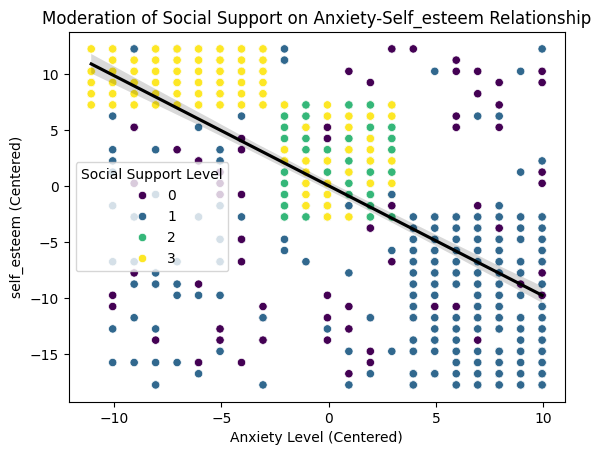

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot using Seaborn with 'hue' to indicate social support levels
sns.scatterplot(data=df_c, x='anxiety_centered', y='self_esteem_centered',
                hue='social_support', palette='viridis', legend='full')
sns.regplot(data=df_c, x='anxiety_centered', y='self_esteem_centered',
            scatter=False, color='black')

# Add labels and title
plt.xlabel('Anxiety Level (Centered)')
plt.ylabel('self_esteem (Centered)')
plt.title('Moderation of Social Support on Anxiety-Self_esteem Relationship')

# Show the plot with legend for hue
plt.legend(title='Social Support Level')
plt.show()
